# A detailed statistical analysis of Titanic data set along with Machine learning model implementation

#### The sinking of the Titanic is one of the most infamous shipwrecks in history.

#### On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

#### While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. Here I am doing an attempt to explore the same.

## Loading Data

In [1]:
# data processing
import pandas as pd

## linear algebra
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
 
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

In [2]:
df=pd.read_csv(r'C:\Users\Amina\OneDrive\Desktop\projects\ML projects\titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [4]:
df.shape

(1309, 21)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

## Data Cleaning

In [7]:
missing=df.isnull().sum().sort_values(ascending=False)
missing.head()

Body        1179
Cabin       1014
Lifeboat     807
Survived     418
Age          263
dtype: int64

In [8]:
percent = round(df.isnull().sum().sort_values(ascending = False) * 100 /len(df),2)


In [9]:
missing_percentage=pd.concat([missing, percent], axis=1, keys=['Missing','Percent'])

In [10]:
missing_percentage.head(15)

,Missing,Percent
Body,1179,90.07
Cabin,1014,77.46
Lifeboat,807,61.65
Survived,418,31.93
Age,263,20.09
Age_wiki,7,0.53
WikiId,5,0.38
Class,5,0.38
Name_wiki,5,0.38
Hometown,5,0.38


In [11]:
drop_column = ['Body','Cabin',]
df.drop(drop_column, axis= 1, inplace = True)

In [12]:
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,3.0


In [13]:
drop_column = ['Lifeboat']
df.drop(drop_column, axis= 1, inplace = True)

In [14]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Survived'].fillna(df['Survived'].mode()[0], inplace = True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
WikiId         5
Name_wiki      5
Age_wiki       7
Hometown       5
Boarded        5
Destination    5
Class          5
dtype: int64

In [16]:
df1 = df.dropna()
print(df1)

      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       0.0       3   
1305         1306       0.0       1   
1306         1307       0.0       3   
1307         1308       0.0       3   
1308         1309       0.0       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [17]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
WikiId         0
Name_wiki      0
Age_wiki       0
Hometown       0
Boarded        0
Destination    0
Class          0
dtype: int64

## Data Visualization

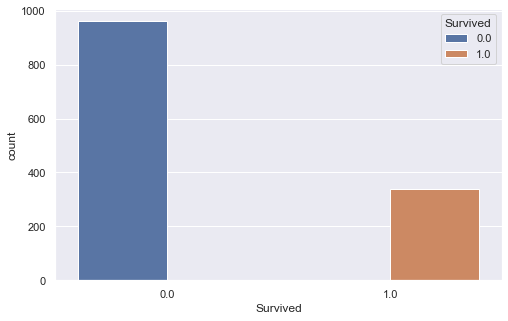

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize = (8, 5))
graph= sns.countplot(x='Survived', hue="Survived", data=df1)


### Male and female survival count

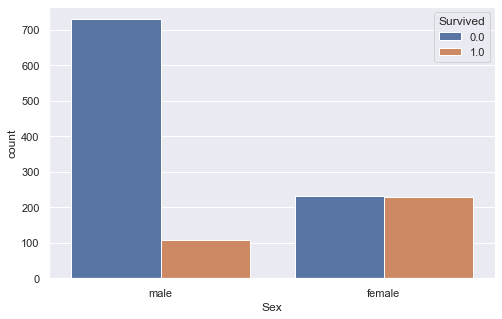

In [19]:
plt.figure(figsize = (8, 5))
graph  = sns.countplot(x ="Sex", hue ="Survived", data = df1)


### Embarked and p-class vs survival

#### Embarked: From which location passenger go on board to Titanic.

C = Cherbourg
Q = Queenstown
S = Southampton


#### PClass: Passenger belongs to which class.

1st = Upper
2nd = Middle
3rd = Lower

C:\Users\Amina\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


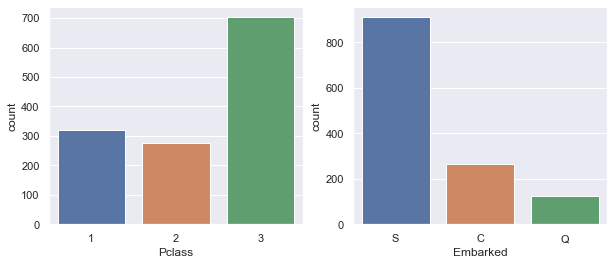

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4)) 
x = sns.countplot(df1['Pclass'], ax=ax[0])
y = sns.countplot(df1['Embarked'], ax=ax[1])

fig.show()

#### Since it does not matter from where didi the passenger board ,as it is more important that the passenger was currently on Titanic,as we know that At 2:20 a.m. on April 15, 1912, the British ocean liner Titanic sinks into the North Atlantic Ocean.We can use Embarked as feature here for getting high accuracy but logically its doesn't matter. so we drop it out.

In [21]:
drop_column = ['Embarked']
df1.drop(drop_column, axis=1, inplace = True)

C:\Users\Amina\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0


### Passenger class impact on survival

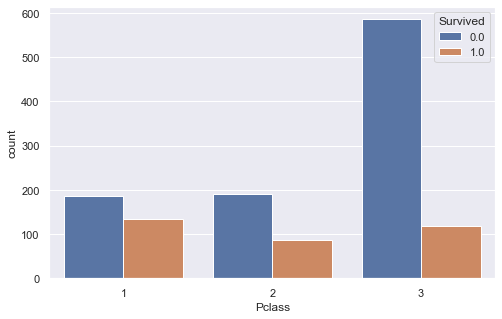

In [23]:
plt.figure(figsize = (8, 5))
graph  = sns.countplot(x ="Pclass", hue ="Survived", data = df1)


##### Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person was in class 1, and class 3 proved the least chances of survival. We will create another pclass plot below

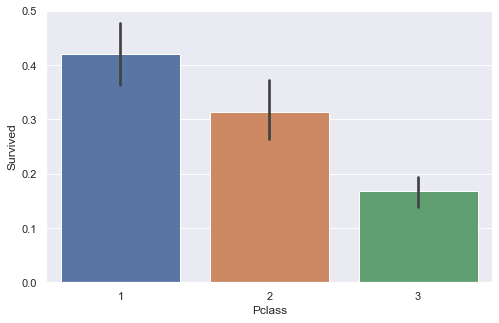

In [24]:
plt.figure(figsize = (8, 5))
sns.barplot(x='Pclass', y='Survived', data=df1)

### Sibsp and parch vs survived

C:\Users\Amina\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


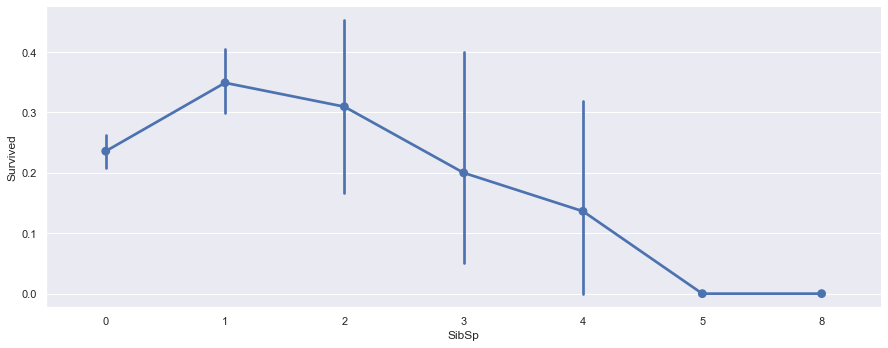

In [25]:
axes = sns.factorplot('SibSp','Survived', 
                      data=df1, aspect = 2.5, )

C:\Users\Amina\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


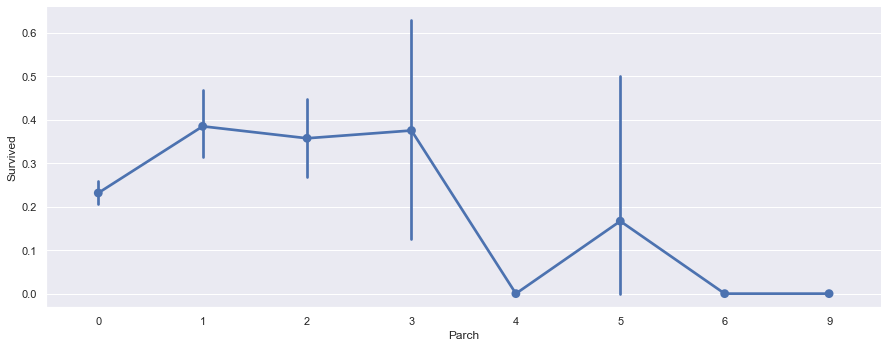

In [26]:
axes = sns.factorplot('Parch','Survived', 
                      data=df1, aspect = 2.5, )

##### Both the above plots describe that the chances of survival goes down as the member in a family increases

### Age vs survived

C:\Users\Amina\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


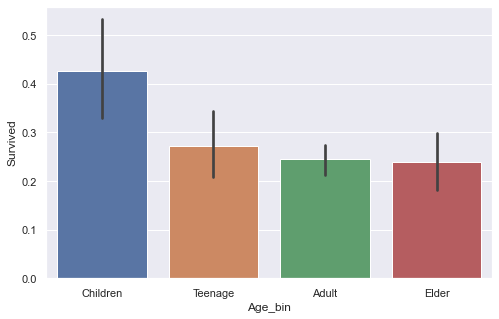

In [27]:
df1['Age_bin'] = pd.cut(df1['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
    
plt.figure(figsize = (8, 5))
sns.barplot(x='Age_bin', y='Survived', data=df1)

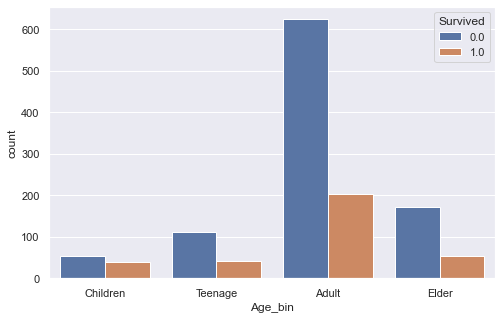

In [28]:
plt.figure(figsize = (8, 5))
sns.countplot(x='Age_bin', hue='Survived', data=df1)


##### Children below 12 ears of age had higher chances of survival,as we can assume that parents and siblings might have saved the younger ones before themselves.

### Fare vs survived

C:\Users\Amina\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


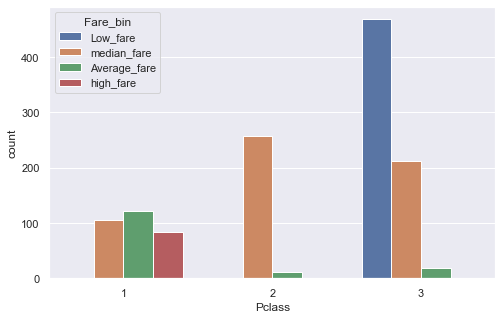

In [29]:
df1['Fare_bin'] = pd.cut(df1['Fare'], bins=[0,10,50,100,550], labels=['Low_fare','median_fare','Average_fare','high_fare'])
plt.figure(figsize = (8, 5))
sns.countplot(x='Pclass', hue='Fare_bin', data=df1)


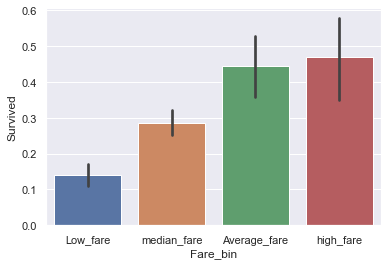

In [30]:
sns.barplot(x='Fare_bin', y='Survived', data=df1)

##### people in Pclass 1 with high fare had a higher survival chance, and people with low to average fare had a very low survival rate

### Correlation matrix

In [31]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class,Age_bin,Fare_bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0,Adult,Low_fare
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0,Adult,Average_fare
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0,Adult,Low_fare
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0,Adult,Average_fare
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0,Adult,Low_fare


In [32]:
pd.DataFrame(abs(df1.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
PassengerId,0.330957
Pclass,0.243592
Class,0.241899
WikiId,0.235961
Fare,0.174900
Age,0.059548
Parch,0.057145
Age_wiki,0.045459
SibSp,0.015362


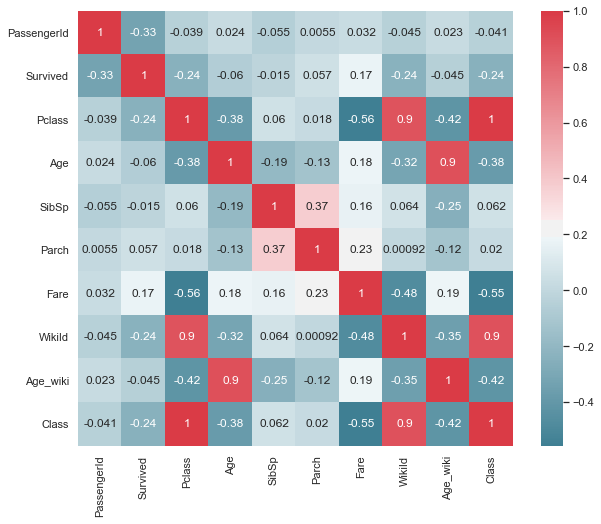

In [33]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

### Feature engineering

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1299 non-null   int64   
 1   Survived     1299 non-null   float64 
 2   Pclass       1299 non-null   int64   
 3   Name         1299 non-null   object  
 4   Sex          1299 non-null   object  
 5   Age          1299 non-null   float64 
 6   SibSp        1299 non-null   int64   
 7   Parch        1299 non-null   int64   
 8   Ticket       1299 non-null   object  
 9   Fare         1299 non-null   float64 
 10  WikiId       1299 non-null   float64 
 11  Name_wiki    1299 non-null   object  
 12  Age_wiki     1299 non-null   float64 
 13  Hometown     1299 non-null   object  
 14  Boarded      1299 non-null   object  
 15  Destination  1299 non-null   object  
 16  Class        1299 non-null   float64 
 17  Age_bin      1299 non-null   category
 18  Fare_bin     1282 non-null  

In [36]:
# Convert ‘Sex’ feature into numeric.
genders = {"male": 0, "female": 1}

df1['Sex'] = df1['Sex'].map(genders)
df1['Sex'].value_counts()

C:\Users\Amina\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    838
1    461
Name: Sex, dtype: int64

In [37]:
drop_column = ['Age_bin','Fare','Name','Ticket', 'PassengerId','WikiId','Name_wiki','Age_wiki','Hometown','Boarded','Destination','Fare_bin']
df1.drop(drop_column, axis=1, inplace = True)

C:\Users\Amina\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Class
0,0.0,3,0,22.0,1,0,3.0
1,1.0,1,1,38.0,1,0,1.0
2,1.0,3,1,26.0,0,0,3.0
3,1.0,1,1,35.0,1,0,1.0
4,0.0,3,0,35.0,0,0,3.0


### Predictive modelling

In [39]:
all_features = df1.drop("Survived",axis=1)
Targete = df1["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targete,test_size=0.3,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((909, 6), (390, 6), (909,), (390,))

In [40]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [58]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 22)
logreg.fit(X_train, y_train)



LogisticRegression(random_state=22)

In [50]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 22)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=22)

In [43]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [51]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 22)
dectree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=22)

In [52]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 22)
ranfor.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=22)

In [53]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
#Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [54]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
#accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [55]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
#print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 77.94871794871796
Support Vector Classifier: 74.35897435897436
Naive Bayes: 71.53846153846153
Decision tree: 74.1025641025641
Random Forest: 74.35897435897436


##### Logistic regression gives the best accuracy score

### Evaluation

In [59]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_logreg)
cm

array([[267,  33],
       [ 53,  37]], dtype=int64)

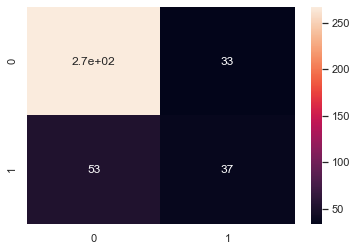

In [60]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [61]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_ranfor))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       300
         1.0       0.43      0.36      0.39        90

    accuracy                           0.74       390
   macro avg       0.62      0.61      0.61       390
weighted avg       0.73      0.74      0.73       390

